## Assignment Questions

__Q1. Explain the concept of precision and recall in the context of classification models.__

__Ans)__ Precision and recall are two important metrics used in classification models.

Precision measures the accuracy of positive predictions. It calculates the proportion of correctly predicted positive instances out of all instances predicted as positive. A high precision indicates a low rate of false positives.

Recall, also known as sensitivity or true positive rate, measures the model's ability to identify all positive instances correctly. It calculates the proportion of correctly predicted positive instances out of all actual positive instances. A high recall indicates a low rate of false negatives.

Precision focuses on the reliability of positive predictions, while recall emphasizes the model's ability to capture all positive instances. The choice between precision and recall depends on the specific requirements of the problem. A balance between the two metrics is often desired, but optimizing one usually comes at the cost of the other due to the inherent trade-off between false positives and false negatives.

__Q2. What is the F1 score and how is it calculated? How is it different from precision and recall?__

__Ans)__ The F1 score is a performance metric that combines precision and recall into a single value. It provides a balanced measure of a classification model's performance by considering both the positive predictive value (precision) and the sensitivity (recall) of the model.

The F1 score is calculated as the harmonic mean of precision and recall, giving equal importance to both metrics. It is defined as:

F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

The F1 score ranges between 0 and 1, with 1 being the best possible score indicating perfect precision and recall.

The F1 score differs from precision and recall in that it takes into account both metrics simultaneously. While precision and recall focus on specific aspects of a model's performance, the F1 score balances the trade-off between precision and recall.

__Q3. What is ROC and AUC, and how are they used to evaluate the performance of classification models?__

__Ans)__ ROC stands for Receiver Operating Characteristic, and AUC stands for Area Under the ROC Curve. They are commonly used to evaluate the performance of classification models, particularly in binary classification problems.

The ROC curve is a graphical representation of the performance of a classification model at different classification thresholds. It is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The TPR is also known as sensitivity or recall, and it represents the proportion of actual positive cases correctly classified as positive by the model. The FPR is the proportion of actual negative cases incorrectly classified as positive.

The ROC curve provides a comprehensive view of the model's performance across different thresholds, showing the trade-off between TPR and FPR. A model with high discriminatory power will have an ROC curve that is closer to the top left corner, indicating higher TPR and lower FPR. The diagonal line in the ROC space represents the performance of a random classifier.

The AUC is a metric derived from the ROC curve. It represents the area under the curve and provides a single scalar value to summarize the classifier's performance. The AUC ranges from 0 to 1, with a higher value indicating better performance. An AUC of 0.5 suggests that the model's performance is similar to that of a random classifier, while an AUC of 1 indicates a perfect classifier.

The AUC has several advantages in evaluating classification models:

It is insensitive to the threshold selection: AUC considers the overall performance of the model across all possible thresholds, making it a robust measure that is not affected by the specific threshold used to make predictions.

It measures the model's ability to rank examples: AUC evaluates how well the model ranks positive and negative examples. In other words, it assesses the model's ability to assign higher probabilities to positive examples than to negative examples.

It is useful for imbalanced datasets: AUC is less affected by class imbalance since it focuses on the model's ranking ability rather than the absolute number of correct predictions.

In summary, ROC and AUC provide valuable insights into the performance of a classification model, offering a comprehensive evaluation of its ability to discriminate between positive and negative cases.

AUC: 0.913


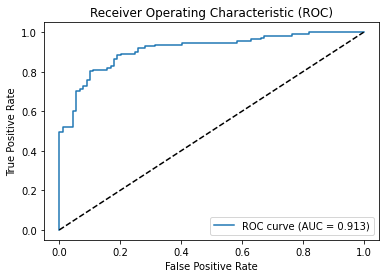

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# Generate some example data
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class

# Compute the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the Area Under the ROC Curve (AUC)
auc_score = auc(fpr, tpr)

# Print the AUC score
print("AUC: {:.3f}".format(auc_score))

# Plot the ROC curve
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, label='ROC curve (AUC = {:.3f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing a random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

__Q4. How do you choose the best metric to evaluate the performance of a classification model?
What is multiclass classification and how is it different from binary classification?__

__Ans)__ When choosing the best metric to evaluate the performance of a classification model, several factors should be considered, including the specific problem and its requirements, the nature of the data, and the goals of the analysis. Here are some key considerations:

* Nature of the problem: Understand the specific problem you are trying to solve. For example, if the problem has class imbalance (i.e., the classes are not represented equally), accuracy may not be a reliable metric. In such cases, metrics like precision, recall, or F1 score may be more appropriate.

* Misclassification costs: Consider the costs associated with different types of misclassifications. In some scenarios, misclassifying positive instances as negative may have more severe consequences than misclassifying negative instances as positive. In such cases, metrics like precision or specificity may be more relevant.

* Data characteristics: Consider the characteristics of your data, such as class distribution and data imbalance. If you have imbalanced classes, metrics like precision, recall, or area under the precision-recall curve may provide a more accurate assessment of the model's performance than accuracy alone.

* Business or domain-specific requirements: Consider any specific requirements or constraints imposed by the business or domain. For example, in a medical setting, sensitivity (recall) may be of utmost importance to correctly identify cases of disease, even if it means a higher false positive rate.

* Model comparison: Ensure the chosen metric allows for fair comparison of different models. Some metrics, such as accuracy, can be misleading when classes are imbalanced. In such cases, metrics like area under the ROC curve (AUC-ROC) or average precision may provide a more reliable basis for model comparison.

Ultimately, the choice of the evaluation metric should align with the objectives of the project and the specific characteristics of the classification problem at hand.

Multiclass classification refers to a classification problem where there are more than two distinct classes to be predicted. In binary classification, the task is to classify instances into one of two classes (e.g., spam or not spam, positive or negative). In contrast, multiclass classification involves predicting instances into one of multiple classes (e.g., classifying an email into categories like spam, social, promotions, or updates).

The main difference between binary and multiclass classification lies in the number of classes involved. In binary classification, the model aims to distinguish between two mutually exclusive classes. It can often be framed as a yes/no or true/false decision. On the other hand, multiclass classification involves predicting instances among multiple classes, where each instance is assigned to one and only one class.

In binary classification, metrics such as accuracy, precision, recall, F1 score, and area under the ROC curve (AUC-ROC) are commonly used to evaluate the model's performance. In multiclass classification, these metrics are extended or adapted to handle multiple classes. Some commonly used metrics for multiclass classification include accuracy, macro/micro-average precision, recall, F1 score, and confusion matrix.

__To summarize, the key difference between binary and multiclass classification lies in the number of classes involved, and the evaluation metrics used for multiclass classification are extensions or adaptations of those used in binary classification to accommodate the multiple classes.__

__Q5. Explain how logistic regression can be used for multiclass classification.__

__Ans)__ Logistic regression is a binary classification algorithm, but it can also be extended to handle multiclass classification problems. One common approach is the "one-vs-rest" or "one-vs-all" strategy.

In the one-vs-rest strategy, the multiclass problem is transformed into multiple binary classification subproblems. For each class, a separate logistic regression model is trained to distinguish that class from the rest of the classes. During training, the samples of the target class are labeled as positive, while the samples of all other classes are labeled as negative. After training all the separate models, predictions are made by selecting the class with the highest probability from the individual models.

__Q6. Describe the steps involved in an end-to-end project for multiclass classification.__

__Ans)__ An end-to-end project for multiclass classification typically involves several steps to develop and deploy a classification model. Here's a high-level overview of the key steps involved:

* Problem Definition: Clearly define the problem and objectives of the multiclass classification task. Understand the business requirements, the classes to predict, and any constraints or specific metrics to optimize.

* Data Collection and Preparation: Gather relevant data for training and evaluation. Perform data cleaning, handle missing values, handle outliers, and preprocess the data (e.g., feature scaling, normalization). Split the data into training and test/validation sets.

* Exploratory Data Analysis (EDA): Explore and analyze the dataset to gain insights and understanding. Visualize the data, identify patterns, relationships, and class distributions. EDA helps in feature selection, feature engineering, and understanding any data biases or challenges.

* Feature Engineering: Transform and engineer the features to improve the predictive power of the model. This may involve selecting relevant features, creating new features, encoding categorical variables, or applying dimensionality reduction techniques.

* Model Selection: Choose an appropriate classification algorithm or ensemble of algorithms suitable for multiclass classification. Consider algorithms like logistic regression, decision trees, random forests, support vector machines (SVM), or deep learning models such as convolutional neural networks (CNN) or recurrent neural networks (RNN).

* Model Training: Train the selected model on the training dataset. This involves feeding the preprocessed features and their corresponding labels to the model. Adjust hyperparameters (e.g., learning rate, regularization) using techniques like cross-validation or grid search to optimize the model's performance.

* Model Evaluation: Evaluate the trained model on the test/validation dataset to assess its performance. Use appropriate evaluation metrics for multiclass classification, such as accuracy, precision, recall, F1 score, or confusion matrix. Analyze the results to identify any issues like overfitting, underfitting, or class imbalance.

* Model Optimization and Tuning: Fine-tune the model by adjusting hyperparameters, trying different algorithms, or using techniques like regularization to improve performance. Iteratively refine the model based on evaluation results until satisfactory performance is achieved.

* Model Deployment: Once the model is trained and optimized, deploy it in a production environment. This involves integrating the model into the application or system where it will be used for predictions. Ensure scalability, efficiency, and appropriate monitoring and error handling mechanisms.

* Model Maintenance and Monitoring: Continuously monitor the model's performance and retrain/update it periodically with new data. Monitor for concept drift or changes in data distribution that may affect the model's performance. Regularly evaluate and refine the model as needed.

__Q7. What is model deployment and why is it important?__

__Ans)__ Model deployment refers to the process of integrating a trained machine learning model into a production environment or system where it can be used to make predictions on new, unseen data. It involves making the model accessible and operational, allowing it to receive input data, perform predictions, and provide outputs or recommendations.

Model deployment is important for several reasons:

Real-world Impact: Deploying a trained model allows it to be applied in real-world scenarios and make predictions on new data. It enables organizations to leverage the model's predictive capabilities to drive decision-making, automate processes, improve efficiency, and achieve desired outcomes.

Scalability and Efficiency: A deployed model is typically optimized for performance, scalability, and efficiency. It allows predictions to be made quickly and efficiently, enabling real-time or near-real-time applications that require fast responses.

Automation and Integration: Deploying a model enables its integration with existing systems, applications, or workflows. This allows for seamless integration of predictive capabilities into business processes, data pipelines, or customer-facing applications. Automation through deployment reduces the need for manual intervention and streamlines operations.

Monitoring and Maintenance: Deployed models can be monitored to track their performance, assess their accuracy, and detect any issues or degradation over time. Monitoring allows organizations to identify when retraining or updating the model is necessary to maintain its effectiveness. It also enables prompt response to model failures or anomalies.

__Q8. Explain how multi-cloud platforms are used for model deployment.__

__Ans)__ In multi-cloud platforms, organizations leverage multiple cloud service providers to deploy and manage their applications and infrastructure. This approach offers flexibility in choosing cloud services, improves availability and performance optimization, enables geographic distribution, enhances disaster recovery and business continuity, optimizes costs, and allows for hybrid deployments. However, it also presents challenges in terms of management complexity and integration. By carefully designing the architecture, implementing robust strategies, and ensuring effective governance, organizations can harness the benefits of multi-cloud platforms for efficient and resilient model deployment.

__Q9. Discuss the benefits and challenges of deploying machine learning models in a multi-cloud
environment.__

__Ans)__ Deploying machine learning models in a multi-cloud environment brings both benefits and challenges. Here's a discussion of the advantages and difficulties associated with multi-cloud model deployment:

Benefits:

* Vendor Flexibility: Multi-cloud environments offer the flexibility to choose the most suitable cloud services from different vendors based on specific requirements, pricing models, or specialized offerings. This allows organizations to leverage the strengths of multiple cloud providers for different aspects of model deployment.

* High Availability and Redundancy: By deploying models across multiple cloud platforms, organizations achieve redundancy and improved availability. If one cloud provider experiences downtime or performance issues, the model can still be accessible and operational on other cloud platforms, ensuring uninterrupted service.

* Performance Optimization: Multi-cloud environments enable organizations to optimize performance by utilizing cloud services that excel in specific areas. For example, one cloud provider may offer superior data processing capabilities, while another may have excellent GPU instances for model inference. Leveraging the strengths of different providers helps optimize performance and cost-effectiveness.

* Geographic Distribution: Deploying models across multiple cloud providers enables geographic distribution. Organizations can host their models in different regions or data centers offered by different providers, reducing latency and improving user experience by serving predictions from locations closer to end-users. It also allows compliance with data sovereignty requirements.

* Cost Optimization: Multi-cloud strategies provide the opportunity to optimize costs by selecting the most cost-effective cloud services from different providers. Organizations can take advantage of pricing variations, spot instances, or reserved instances offered by different providers to reduce infrastructure costs associated with model deployment. Avoiding vendor lock-in can also lead to long-term cost savings.

Challenges:

* Complexity and Management: Deploying models in a multi-cloud environment increases complexity in terms of management, monitoring, and orchestration. Coordinating resources, maintaining consistency, and ensuring proper integration across different cloud platforms can be challenging, requiring robust architecture design and effective management strategies.

* Data Transfer and Integration: Transferring data between different cloud providers and integrating diverse services can be complex and time-consuming. Organizations need to address issues such as data compatibility, network connectivity, and secure data transfer to ensure smooth integration and seamless operation of the model across multiple clouds.

* Security and Compliance: Maintaining security and compliance across multiple cloud providers poses challenges. Organizations must ensure consistent security measures, identity and access management, and compliance with regulations across different environments. Managing security configurations, audits, and monitoring across multiple clouds requires careful attention.

* Vendor Lock-in: While multi-cloud environments aim to avoid vendor lock-in, effectively managing and coordinating across different cloud platforms can create dependencies and complexities in terms of skillsets, APIs, and service interoperability. Mitigating vendor lock-in risks requires careful planning, standardized interfaces, and adoption of cloud-agnostic technologies where feasible.

* Cost and Resource Optimization: While multi-cloud can offer cost optimization opportunities, managing costs across multiple providers can be challenging. Tracking and optimizing resource allocation, billing, and governance across different platforms require effective cost management strategies and monitoring systems.

To successfully deploy machine learning models in a multi-cloud environment, organizations must carefully evaluate the benefits and challenges, design appropriate architectures, adopt standardized practices, implement robust management and monitoring systems, and maintain clear governance and security frameworks.